In [ ]:
import pandas as pd

## Step 2 - Data Loading

In [ ]:
with open('Hamshahri-Corpus.txt', 'r') as file:
    lines = file.readlines()

In [ ]:
# Initialize empty lists for storing data
data = []
current_record = {}

In [ ]:
# Process each line
for line in lines:
    line = line.strip()  # Remove leading/trailing whitespace

    # Check for a new record
    if line.startswith('.DID'):
        if current_record:
            data.append(current_record)  # Append the completed record
            current_record = {}  # Start a new record

        # Extract the value after ".DID"
        current_record['DID'] = line.split('\t')[1]

    # Extract the date value
    elif line.startswith('.Date'):
        current_record['Date'] = line.split('\t')[1]

    # Extract the category value
    elif line.startswith('.Cat'):
        current_record['Cat'] = line.split('\t')[1]

    # Append the line to the text data
    else:
        if 'Text' not in current_record:
            current_record['Text'] = line
        else:
            current_record['Text'] += ' ' + line

In [ ]:
if current_record:
    data.append(current_record)

# Create a DataFrame
df = pd.DataFrame(data)

In [ ]:
df

,DID,Date,Cat,Text
0,1S1,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...
1,2S1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...
2,3S1,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه طرح...
3,4S1,75\04\02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...
4,5S1,75\04\02,elmfa,تخته سياه و غباري كه سترده نمي شود... اشاره; ب...
...,...,...,...,...
165220,60055S2,81\11\20,vrzsh,نماينده فدراسيون جهاني واليبال از ايران هر نظر...
165221,60055S3,81\11\20,vrzsh,شكست نامداران تكواندودر پيكارهاي برتر ليگ گروه...
165222,60055S4,81\11\20,vrzsh,ورزشگاه بزرگ دانشگاه آزاد در تهران ساخته مي شو...
165223,60055S5,81\11\20,vrzsh,رئيس فدراسيون پزشكي انتخاب شد گروه ورزشي: مجمع...


In [ ]:
df.to_csv("dataset.csv", date_format='%Y%m%d')

## Step 3 - Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['Cat'].value_counts()

siasi      17308
eqtes      16408
kharj      14470
akhar      13763
vrzsh      12767
           ...  
igozar         3
theatre        3
Cinew          3
Polig          2
Thought        2
Name: Cat, Length: 105, dtype: int64

Text(0.5, 1.0, 'Category\n')

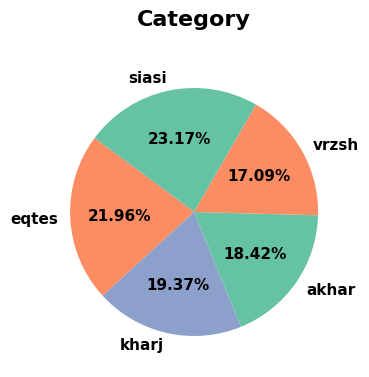

In [ ]:
plt.figure(figsize=(4,6))
colors = sns.color_palette('Set2')[0:3]

values = df['Cat'].value_counts().head(5)
labels = values.index
#round(values/values.sum()*100, 2)

plt.pie(values, labels=labels, autopct='%1.2f%%',
             startangle=60, textprops={'fontsize': 11, 'fontweight':"bold"},
             colors = colors)
plt.title("Category\n", fontsize=16, fontweight="bold")

<Axes: xlabel='count', ylabel='Cat'>

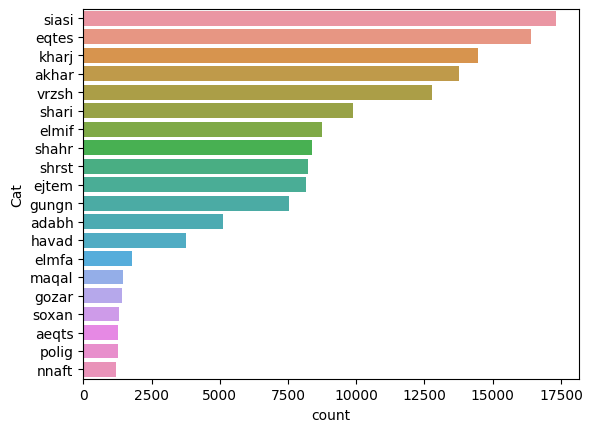

In [ ]:
sns.countplot(y=df['Cat'],order=df['Cat'].value_counts().head(20).index)

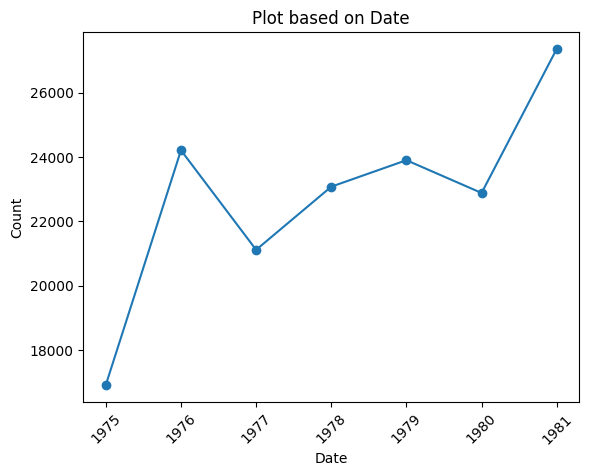

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%y\\%m\\%d', errors='coerce')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by 'Year' and count occurrences of each year
year_counts = df.groupby('Year').size()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Plot based on Date')
plt.xticks(rotation=45)
plt.show()

## Step 4 – Preprocessing

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/My Drive/dataset.csv"

df = pd.read_csv(path)
df = df.drop(columns=['Unnamed: 0'])
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DID,Date,Cat,Text
0,1S1,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...
1,2S1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...
2,3S1,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه طرح...
3,4S1,75\04\02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...
4,5S1,75\04\02,elmfa,تخته سياه و غباري كه سترده نمي شود... اشاره; ب...
...,...,...,...,...
161873,59437S8,81\10\14,eqtes,يادداشت احزاب سياسي و بودجه 82 محمدصادق جنان ص...
161874,59437S9,81\10\14,eqtes,خبرها و نكته ها شهامت يك مدير خبر: ... تا چند ...
161875,59437S10,81\10\14,eqtes,يادآوري دقت معاون اقتصادي سازمان مديريت و برنا...
161876,59438S1,81\10\14,eqtsj,تكرار بحران بيش از 15 ميليون مرد زن و كودك در ...


In [ ]:
df.isnull().sum()

DID     0
Date    0
Cat     0
Text    0
dtype: int64

In [ ]:
import re
def remove_tags(string):
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    return result

In [ ]:
df['Text']=df['Text'].apply(lambda t : remove_tags(t))
df.head()

,DID,Date,Cat,Text
0,1S1,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ن...
1,2S1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكتا...
2,3S1,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه طرح...
3,4S1,75\04\02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ن...
4,5S1,75\04\02,elmfa,تخته سياه و غباري كه سترده نمي شود... اشاره; ب...


stop words

In [ ]:
stop_words = []
with open('/content/drive/My Drive/PersianStopWords', "rb") as file:
  for line in file:
    stop_words.append(line.decode("UTF-8").replace('\n', ''))

In [ ]:
for index , row in df.iterrows():
    sentence_list=[]
    text = row['Text']

    for word in text.split(' '):
        if word not in stop_words:
            sentence_list.append(word)

    df.loc[index]={
        'Text':' '.join(sentence_list),
        'DID':row['DID'],
        'Cat':row['Cat'],
        'Date':row['Date']
    }

In [ ]:
#pip install numpy==1.23.3

In [ ]:
#pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.8/352.8 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


In [ ]:
import re
import hazm


normalizer = hazm.Normalizer() # Hazm normlizer
lemmatize = hazm.Lemmatizer().lemmatize # Hazm lemmatizer
stem = hazm.Stemmer().stem # Hazm Stemmer
clean_lemmatize = lambda comment:[lemmatize(word) if '#' not in lemmatize(word) else word for word in comment]
clean_stem = lambda comment:[stem(word) for word in comment]

symbols_complete_reg = re.compile(r"(\d|\"|'ٍ|¬|[؛“،,”‘۔’’‘–]|[|\.÷+\]\[\)\(\:\-\?»\=\{}\*«»_…\؟!/ـ]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء])")

def remeove_arabic(text):
    # remove arabic alphabet
    mapping = {
        u"ۀ" : u"ه",
        u"ة" : u"ت",
        u"ي" : u"ی",
        u"ؤ" : u"و",
        u"إ" : u"ا",
        u"ٹ" : u"ت",
        u"ڈ" : u"د",
        u"ئ" : u"ی",
        u"ﻨ" : u"ن",
        u"ﺠ" : u"ج",
        u"ﻣ" : u"م",
        u"ﷲ" : u"",
        u"ﻳ" : u"ی",
        u"ٻ" : u"ب",
        u"ٱ" : u"ا",
        u"ڵ" : u"ل",
        u"ﭘ" : u"پ",
        u"ﻪ" : u"ه",
        u"ﻳ" : u"ی",
        u"ٻ" : u"ب",
        u"ں" : u"ن",
        u"ٶ" : u"و",
        u"ٲ" : u"ا",
        u"ہ" : u"ه",
        u"ﻩ" : u"ه",
        u"ﻩ" : u"ه",
        u"ك" : u"ک",
        u"ﺆ" : u"و",
        u"أ" : u"ا",
        u"ﺪ" : u"د"
    }
    arabic_keys =  re.compile(r"(" + "|".join(mapping.keys()) + r")")
    return arabic_keys.sub(lambda x: mapping[x.group()], text)

In [ ]:
def clean_comment(text, allspace=True, punc=True, sentence=True, only_persian=True):

    #remove halph space, new line ('\n') and '\r'
    text = text.replace('\u200c', ' ').replace('\n', '').replace('\r', '')
    # remove punctuations
    text = re.sub(symbols_complete_reg, "", text)
    # remove arabic letters
    text = remeove_arabic(text)
    # convert spaces to a one space and delete leading and trailing spaces
    text = re.sub("(\s)+", " ", text)
    text = text.strip()
    #lemmatize
    " ".join(clean_lemmatize(text.split(" ")))
    #stemming
    " ".join(clean_stem(text.split(" ")))
    # convert spaces to a one space and delete leading and trailing spaces
    text = re.sub("(\s)+", " ", text)
    text = text.strip()
    return text

In [ ]:
df['Text'] = df['Text'].apply(lambda text:clean_comment(text))

### Normalize
The text have different lengths based on words! Detecting the most normal range could help us find the maximum length of the sequences for the preprocessing step

In [ ]:
import numpy as np

df['text_len_by_words'] = df['Text'].apply(lambda t: len(hazm.word_tokenize(t)))
min_max_len = df["text_len_by_words"].min(), df["text_len_by_words"].max()
print(f'Min: {min_max_len[0]} \tMax: {min_max_len[1]}')

Min: 0 	Max: 19273


In [ ]:
def data_gl_than(data, less_than=100.0, greater_than=0.0, col='text_len_by_words'):
    data_length = data[col].values
    data_glt = sum([1 for length in data_length if greater_than < length <= less_than])
    data_glt_rate = (data_glt / len(data_length)) * 100
    print(f'Texts with word length of greater than {greater_than} and less than {less_than} includes {data_glt_rate:.2f}% of the whole!')

In [ ]:
minlim, maxlim = 10, 1000
data_gl_than(df, maxlim, minlim)

Texts with word length of greater than 10 and less than 1000 includes 94.42% of the whole!


In [ ]:
df['text_len_by_words'] = df['text_len_by_words'].apply(lambda len_t: len_t if minlim <= len_t else None)
df = df.dropna(subset=['text_len_by_words'])
df = df.reset_index(drop=True)

In [ ]:
int(np.mean(df['text_len_by_words']))

270

In [ ]:
df['Cat'].value_counts()[:20]

siasi    17296
eqtes    16351
kharj    14463
vrzsh    12760
akhar    12503
shari     9862
elmif     8730
shahr     8378
ejtem     8151
shrst     8142
gungn     7518
adabh     5134
havad     3757
elmfa     1784
maqal     1438
gozar     1418
soxan     1308
aeqts     1271
polig     1225
nnaft     1190
Name: Cat, dtype: int64

balance data which their cats are under 5% instances

In [ ]:
groupby_cat = df.groupby('Cat')['Cat'].count()

group_cats = list(groupby_cat.index)
group_values = list(groupby_cat.values)
remove_cats = []
for idx, cat in enumerate(group_cats):
  if group_values[idx] < 8000:
    remove_cats.append(cat)


In [ ]:
df['Cat'] = df['Cat'].apply(lambda cat: None if cat in remove_cats else cat)
df = df.dropna(subset=['Cat'])
df = df.reset_index(drop=True)

In [ ]:
labels = list(sorted(df['Cat'].unique()))
print(f'We have #{len(labels)}: {labels}')
id2labels = {idx:l for idx, l in enumerate(labels)}
print(id2labels)

We have #10: ['akhar', 'ejtem', 'elmif', 'eqtes', 'kharj', 'shahr', 'shari', 'shrst', 'siasi', 'vrzsh']
{0: 'akhar', 1: 'ejtem', 2: 'elmif', 3: 'eqtes', 4: 'kharj', 5: 'shahr', 6: 'shari', 7: 'shrst', 8: 'siasi', 9: 'vrzsh'}


In [ ]:
df

,DID,Date,Cat,Text,text_len_by_words
0,4S1,75\04\02,ejtem,بازی جدی بگیریم مطالعه ای مقدماتی پیرامون نقش ...,1153.0
1,11S1,75\04\02,eqtes,رشد اقتصادی کشورهای صنعتی سال آینده سازمان همک...,87.0
2,12S1,75\04\02,eqtes,تن مدیران ارشد کشور تهران آموزش دیدند سرویس اق...,150.0
3,13S1,75\04\02,eqtes,کمیته راهنمایی سرمایه گذاران ایرانی تشکیل می ت...,144.0
4,14S1,75\04\02,eqtes,هفته صرفه جویی مصرف آب آغاز سرویس اقتصادی هفته...,87.0
...,...,...,...,...,...
116631,59437S6,81\10\14,eqtes,منطقه آزاد کیش تالار فرعی معاملات ارزی کشور تب...,130.0
116632,59437S7,81\10\14,eqtes,روغن موتور سطح کیفیت جهانی ایران تولید گروه اق...,103.0
116633,59437S8,81\10\14,eqtes,یادداشت احزاب سیاسی بودجه محمدصادق جنان صفت بر...,135.0
116634,59437S9,81\10\14,eqtes,خبرها نکته شهامت یک مدیر خبر سال پیش وسیعی شرق...,109.0


In [ ]:
df.to_csv("/content/drive/My Drive/dataset_4.csv", date_format='%Y%m%d')

## Step 5 - Feature Engineering

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/dataset_4.csv')
df = df.drop(columns=['Unnamed: 0','text_len_by_words'])
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DID,Date,Cat,Text
0,4S1,75\04\02,ejtem,بازی جدی بگیریم مطالعه ای مقدماتی پیرامون نقش ...
1,11S1,75\04\02,eqtes,رشد اقتصادی کشورهای صنعتی سال آینده سازمان همک...
2,12S1,75\04\02,eqtes,تن مدیران ارشد کشور تهران آموزش دیدند سرویس اق...
3,13S1,75\04\02,eqtes,کمیته راهنمایی سرمایه گذاران ایرانی تشکیل می ت...
4,14S1,75\04\02,eqtes,هفته صرفه جویی مصرف آب آغاز سرویس اقتصادی هفته...
...,...,...,...,...
116631,59437S6,81\10\14,eqtes,منطقه آزاد کیش تالار فرعی معاملات ارزی کشور تب...
116632,59437S7,81\10\14,eqtes,روغن موتور سطح کیفیت جهانی ایران تولید گروه اق...
116633,59437S8,81\10\14,eqtes,یادداشت احزاب سیاسی بودجه محمدصادق جنان صفت بر...
116634,59437S9,81\10\14,eqtes,خبرها نکته شهامت یک مدیر خبر سال پیش وسیعی شرق...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df.isnull().sum()

DID     0
Date    0
Cat     0
Text    0
dtype: int64

In [ ]:
df.dropna(subset=['Text'], inplace=True)

In [ ]:
# TF-IDF Matrix for top 5000 words
vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=5000)

# Fit and transform the 'Text' column using TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['Text'])

In [ ]:
tfidf_array = tfidf_matrix.toarray()

In [ ]:
tfidf_array.shape

(116636, 5000)

<ipython-input-8-c857ed98da24>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nato_df['Date'] = pd.to_datetime(nato_df['Date'], format='%y\\%m\\%d', errors='coerce')


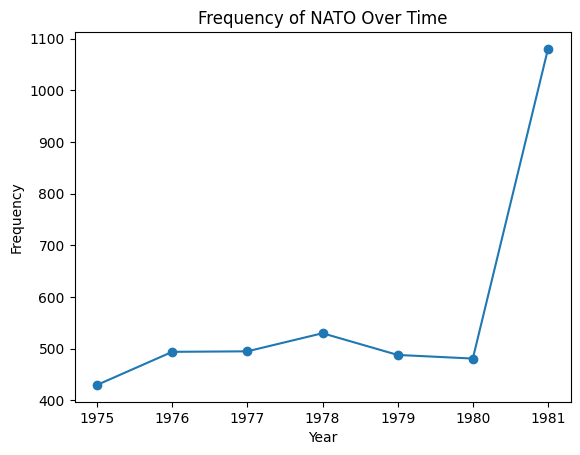

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_main = pd.read_csv('/content/drive/My Drive/dataset.csv')
df_main = df_main.drop(columns=['Unnamed: 0'])


# Filter the DataFrame to include only rows containing the word 'ناتو' (NATO)
nato_df = df_main[df_main['Text'].str.contains('ناتو')]

# Convert the 'Date' column to datetime format if needed
nato_df['Date'] = pd.to_datetime(nato_df['Date'], format='%y\\%m\\%d', errors='coerce')

# Group the DataFrame by year and count occurrences of 'ناتو' in each year
frequency_by_year = nato_df.groupby(nato_df['Date'].dt.year).size()

# Plot the frequency of 'ناتو' over time
plt.plot(frequency_by_year.index, frequency_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of NATO Over Time')
plt.show()

## Step 6 - Dimensionality Reduction

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
pca_reducer_2 = PCA(n_components = 2)
reduced_features = pca_reducer_2.fit_transform(tfidf_array)

sum(pca_reducer_2.explained_variance_ratio_)

0.02542951748377438

In [ ]:
# Create a new DataFrame with the reduced features
reduced_df = pd.DataFrame(reduced_features, columns=['Feature 1', 'Feature 2'])

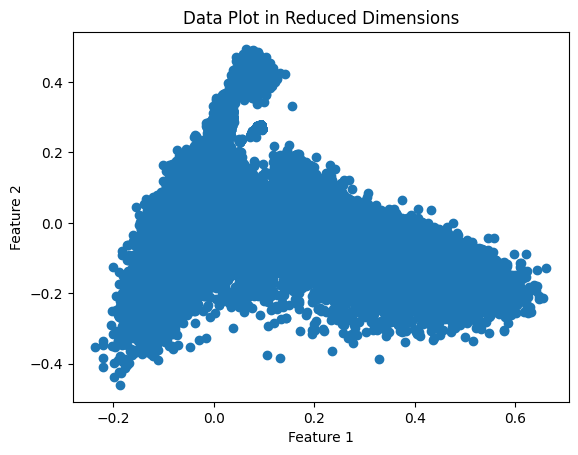

In [ ]:
plt.scatter(reduced_df['Feature 1'], reduced_df['Feature 2'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Plot in Reduced Dimensions')
plt.show()

## Step 7 - Clustering

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the K-means model to the reduced data
kmeans.fit(reduced_df)

# Get the cluster labels assigned by K-means
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


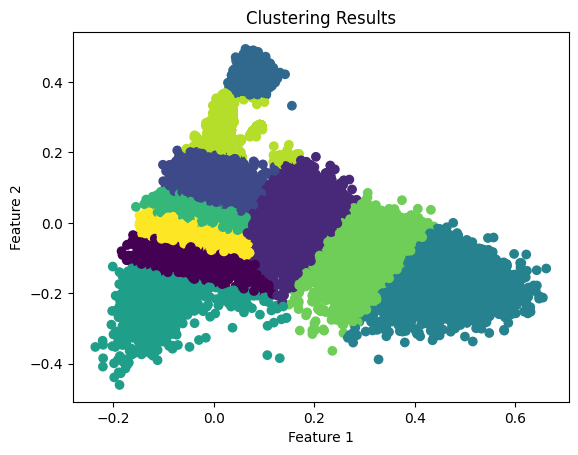

In [ ]:
plt.scatter(reduced_df['Feature 1'], reduced_df['Feature 2'], c=cluster_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Results')
plt.show()

## Step 8 - Storage

In [ ]:
pca_reducer_5 = PCA(n_components = 5)
reduced_features = pca_reducer_5.fit_transform(tfidf_array)

sum(pca_reducer_5.explained_variance_ratio_)

0.05106137341931134

In [ ]:
reduced_df = pd.DataFrame(reduced_features, columns=['Feature 1', 'Feature 2','Feature 3','Feature 4','Feature 5'])

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the K-means model to the reduced data
kmeans.fit(reduced_df)

# Get the cluster labels assigned by K-means
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
result_df = pd.concat([df, pd.Series(cluster_labels, name='Cluster Labels')], axis=1)

# Save the result DataFrame to a CSV file
result_df.to_csv('/content/drive/My Drive/clustering_results.csv', index=False)

In [ ]:
result_df.sample(7)

,DID,Date,Cat,Text,Cluster Labels
50099,45129S7,78\04\14,elmif,شناسنامه اشیای تاریخی فرهنگی کشور صادر می گروه...,4
73473,49187S3,79\06\02,akhar,مناسبت سال امیرالمومنین مسابقه کتابخوانی استان...,0
34763,42503S5,77\06\24,vrzsh,تیم تکواندو نوجوانان ایران جهان هفتم گروه ورزش...,2
89145,51588S9,80\03\13,vrzsh,خبرهایی فوتبال جهان دومین پیروزی تیم ملی ژاپن ...,2
110641,57123S4,81\06\03,kharj,وزیر خارجه قطر بغداد می رود حمد بن جاسم آل ثان...,8
70647,48719S6,79\04\19,kharj,مذاکرات صلح شاخ آفریقا آمریکا پایان یافت گوی س...,8
70574,48706S2,79\04\18,kharj,عفو بین الملل عربستان حقوق مهاجران غیرقانونی م...,8


In [ ]:
import pickle

with open("/content/drive/My Drive/model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

## Step 9 - Classification

In [1]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=7
knn = KNeighborsClassifier(n_neighbors=7)

In [2]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg = LogisticRegression()

In [3]:
from sklearn.naive_bayes import GaussianNB

# Create a Naïve Bayes classifier
nb = GaussianNB()

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

In [5]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble model with voting
ensemble_model = VotingClassifier(estimators=[
    ('knn', knn),
    ('logreg', logreg),
    ('nb', nb),
    ('rf', rf)
], voting='hard')  # 'hard' voting for majority vote, 'soft' voting for weighted average

## Step 10 - Preprocessing on Data

In [6]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/dataset_4.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['Cat'])

In [8]:
from sklearn.model_selection import train_test_split

df.dropna(subset=['Text'], inplace=True)

y = encoded_labels
X = df['Text']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features=4000)

X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.fit_transform(X_test).toarray()

## Step 11 - Model Training

In [10]:
nb.fit(X_train, y_train)

GaussianNB()

In [11]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
ensemble_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('logreg', LogisticRegression()),
                             ('nb', GaussianNB()),
                             ('rf', RandomForestClassifier())])

## Step 12 - Model Evaluation

In [15]:
# Make predictions on the test set
knn_pred1 = knn.predict(X_train)
logreg_pred1 = logreg.predict(X_train)
nb_pred1 = nb.predict(X_train)
rf_pred1 = rf.predict(X_train)
ensemble_model_pred1 = ensemble_model.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy scores
knn_accuracy1 = accuracy_score(y_train, knn_pred1)
logreg_accuracy1 = accuracy_score(y_train, logreg_pred1)
nb_accuracy1 = accuracy_score(y_train, nb_pred1)
rf_accuracy1 = accuracy_score(y_train, rf_pred1)
ensemble_model_accuracy1 = accuracy_score(y_train, ensemble_model_pred1)

In [17]:
print("KNN Accuracy on Training Data:", knn_accuracy1)
print("Logistic Regression Accuracy on Training Data:", logreg_accuracy1)
print("Naïve Bayes Accuracy on Training Data:", nb_accuracy1)
print("Random Forest Accuracy on Training Data:", rf_accuracy1)
print("Ensemble Model Accuracy on Training Data:", ensemble_model_accuracy1)

KNN Accuracy on Training Data: 0.8073155570797788
Logistic Regression Accuracy on Training Data: 0.8860440691044712
Naïve Bayes Accuracy on Training Data: 0.7203348051614009
Random Forest Accuracy on Training Data: 0.9999571312213315
Ensemble Model Accuracy on Training Data: 0.9076713679427273


In [18]:
# Make predictions on the test set
knn_pred = knn.predict(X_test)
logreg_pred = logreg.predict(X_test)
nb_pred = nb.predict(X_test)
rf_pred = rf.predict(X_test)
ensemble_model_pred = ensemble_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy scores
knn_accuracy = accuracy_score(y_test, knn_pred)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
ensemble_model_accuracy = accuracy_score(y_test, ensemble_model_pred)

In [20]:
print("KNN Accuracy on Testing Data:", knn_accuracy)
print("Logistic Regression Accuracy on Testing Data:", logreg_accuracy)
print("Naïve Bayes Accuracy on Testing Data:", nb_accuracy)
print("Random Forest Accuracy on Testing Data:", rf_accuracy)
print("Ensemble Model Accuracy on Testing Data:", ensemble_model_accuracy)

KNN Accuracy on Testing Data: 0.26727537722908096
Logistic Regression Accuracy on Testing Data: 0.2808641975308642
Naïve Bayes Accuracy on Testing Data: 0.13473079561042525
Random Forest Accuracy on Testing Data: 0.2069187242798354
Ensemble Model Accuracy on Testing Data: 0.23563957475994513


In [21]:
from sklearn.metrics import precision_score


knn_precision = precision_score(y_test, knn_pred,average='micro')
logreg_precision = precision_score(y_test, logreg_pred,average='micro')
nb_precision = precision_score(y_test, nb_pred,average='micro')
rf_precision = precision_score(y_test, rf_pred,average='micro')
ensemble_model_precision = precision_score(y_test, ensemble_model_pred,average='micro')

In [22]:
print("KNN Precision:", knn_precision)
print("Logistic Regression Precision:", logreg_precision)
print("Naïve Bayes Precision:", nb_precision)
print("Random Forest Precision:", rf_precision)
print("Ensemble Model Precision:", ensemble_model_precision)

KNN Precision: 0.26727537722908096
Logistic Regression Precision: 0.2808641975308642
Naïve Bayes Precision: 0.13473079561042525
Random Forest Precision: 0.2069187242798354
Ensemble Model Precision: 0.23563957475994513


In [23]:
from sklearn.metrics import confusion_matrix


knn_cm = confusion_matrix(y_test, knn_pred)
logreg_cm = confusion_matrix(y_test, logreg_pred)
nb_cm = confusion_matrix(y_test, nb_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
ensemble_model_cm = confusion_matrix(y_test, ensemble_model_pred)

# Print the confusion matrix for each model
print("KNN Confusion Matrix:")
print(knn_cm)
print("\nLogistic Regression Confusion Matrix:")
print(logreg_cm)
print("\nNaïve Bayes Confusion Matrix:")
print(nb_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
print("\nEnsemble Model Confusion Matrix:")
print(ensemble_model_cm)

KNN Confusion Matrix:
[[711 348 242 212 187  75 135  86 235 341]
 [149 431 126 171 203  82 157 101 127  61]
 [209 178 647 151 171  49  83  76  96  85]
 [279 585 212 830 370 136 165 143 340 157]
 [191 331 121 409 884 147 201  90 363 109]
 [175 189 161 247 168 142 220 109 153  86]
 [136 236 152 272 167 122 499 105 153  71]
 [231 166 164 265 117  80 149 199 180  76]
 [272 660 230 440 428 148 209 115 931 141]
 [137 367 176 258 176  80 210  39 172 961]]

Logistic Regression Confusion Matrix:
[[1998   69   28   42  177   83   33   13  103   26]
 [ 861  311   33   58   64   58   37   13  163   10]
 [1079   93  287   23   33   47   14   14  143   12]
 [1658  419   13  300  142  159   61  109  321   35]
 [1182  133   12   78 1013  100   26    7  273   22]
 [ 747  116   34   65  101  257  119   59  121   31]
 [ 789  111   24   54   45  248  415   60  146   21]
 [ 645  216   20   96   68  138   80  124  212   28]
 [1901  291   36   84  212  104   69   40  822   15]
 [ 959  105    9   74   86   60